In [32]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [33]:
# 📌 Load dataset
data = pd.read_csv(r"C:\Users\ishwa\OneDrive\Desktop\AI PriceOptima\archive (6)\dynamic_pricing.csv")
print("Data Shape:", data.shape)
data.head()

Data Shape: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [34]:
# Outliers detection using IQR method
# -----------------------------------

import numpy as np
import pandas as pd

def find_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return series[(series < low) | (series > high)]

# Select only numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

outlier_summary = {}

for col in num_cols:
    outliers = find_iqr_outliers(data[col])
    outlier_summary[col] = {
        'outlier_count': outliers.shape[0],
        'outlier_fraction': round(outliers.shape[0] / data.shape[0], 3)
    }

# Convert summary dictionary to DataFrame
outlier_summary_df = pd.DataFrame(outlier_summary).T  # transpose for better readability
outlier_summary_df


,outlier_count,outlier_fraction
Number_of_Riders,0.0,0.00
Number_of_Drivers,10.0,0.01
Number_of_Past_Rides,0.0,0.00
Average_Ratings,0.0,0.00
Expected_Ride_Duration,0.0,0.00
Historical_Cost_of_Ride,0.0,0.00


In [35]:
# Encoding 
# -------------------------------
print("Data before encoding:\n", data.head())

categorical_cols = data.select_dtypes(include=["object"]).columns

# 🔹 Label Encoding
le = LabelEncoder()
data_label_encoded = data.copy()
for col in categorical_cols:
    data_label_encoded[col] = le.fit_transform(data_label_encoded[col])

print("\n Label Encoding applied.")
print("Data after Label Encoding:\n", data_label_encoded.head())

Data before encoding:
    Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium   

In [36]:
# 🔹 One-Hot Encoding
data_onehot_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("\n One-Hot Encoding applied.")
print("Data after One-Hot Encoding:\n", data_onehot_encoded.head())



 One-Hot Encoding applied.
Data after One-Hot Encoding:
    Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  Average_Ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   Expected_Ride_Duration  Historical_Cost_of_Ride  \
0                      90               284.257273   
1                      43               173.874753   
2                      76               329.795469   
3                     134               470.201232   
4                     149               579.681422   

   Location_Category_Suburban  Location_Category_Urban  \
0                       False                     True   
1             

In [37]:
# Summary statistics and group correlations 
# overall summary:
display(data.describe().T)

# groupby summary: by Customer_Loyalty_Status (original column)
grouped = data.groupby('Customer_Loyalty_Status').agg({
    'Historical_Cost_of_Ride': ['mean', 'median', 'std'],
    'Number_of_Riders': ['mean', 'median']
})
display(grouped)

# correlation between target and numeric features (sorted)
corr_target = data.select_dtypes(include=[np.number]).corr()['Historical_Cost_of_Ride'].abs().sort_values(ascending=False)
corr_target

,count,mean,std,min,25%,50%,75%,max
Number_of_Riders,1000.0,60.372000,23.701506,20.000000,40.000000,60.000000,81.000000,100.000000
Number_of_Drivers,1000.0,27.076000,19.068346,5.000000,11.000000,22.000000,38.000000,89.000000
Number_of_Past_Rides,1000.0,50.031000,29.313774,0.000000,25.000000,51.000000,75.000000,100.000000
Average_Ratings,1000.0,4.257220,0.435781,3.500000,3.870000,4.270000,4.632500,5.000000
Expected_Ride_Duration,1000.0,99.588000,49.165450,10.000000,59.750000,102.000000,143.000000,180.000000
Historical_Cost_of_Ride,1000.0,372.502623,187.158756,25.993449,221.365202,362.019426,510.497504,836.116419


Historical_Cost_of_Ride                          \
                                           mean      median         std   
Customer_Loyalty_Status                                                   
Gold                                 376.118746  373.975636  184.967070   
Regular                              380.125251  358.951011  189.611633   
Silver                               362.772140  348.669562  186.956263   

                        Number_of_Riders         
                                    mean median  
Customer_Loyalty_Status                          
Gold                           59.086262   59.0  
Regular                        62.746875   66.0  
Silver                         59.397820   57.0

Historical_Cost_of_Ride    1.000000
Expected_Ride_Duration     0.927547
Number_of_Past_Rides       0.035859
Number_of_Drivers          0.017082
Number_of_Riders           0.005826
Average_Ratings            0.001063
Name: Historical_Cost_of_Ride, dtype: float64

In [38]:
# Segmentation: compare average ride cost by customer loyalty and booking time (robust)
cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

cost_col = find_col(cols, ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price'])

# detect loyalty/time-like columns (may be multiple one-hot / categories)
loyalty_cols = [c for c in cols if 'customer_loyalty' in c.lower() or 'loyalty' in c.lower()]
time_cols = [c for c in cols if 'time_of_booking' in c.lower() or 'time' in c.lower()]

if cost_col is None:
    print("⚠️ Could not find a cost column (historical_cost_of_ride / cost / fare / price). Available columns:\n", cols)
else:
    print(f"Using cost column: {cost_col}\n")

    # Customer loyalty
    if len(loyalty_cols) == 0:
        print("⚠️ No customer loyalty column detected. Available columns:\n", cols)
    else:
        print("🔹 Average", cost_col, "by detected customer loyalty columns:\n")
        for lc in loyalty_cols:
            try:
                grp = data.groupby(lc)[cost_col].mean()
                print(f"-> Grouping by '{lc}':")
                print(grp)
                print()
            except Exception as e:
                print(f"Error grouping by {lc}: {e}")

    # Time of booking
    if len(time_cols) == 0:
        print("⚠️ No time-of-booking column detected. Available columns:\n", cols)
    else:
        print("🔹 Average", cost_col, "by detected time-of-booking columns:\n")
        for tc in time_cols:
            try:
                grp = data.groupby(tc)[cost_col].mean()
                print(f"-> Grouping by '{tc}':")
                print(grp)
                print()
            except Exception as e:
                print(f"Error grouping by {tc}: {e}")

# If you prefer a specific column name, replace the detected names above or tell me which to use.

Using cost column: Historical_Cost_of_Ride

🔹 Average Historical_Cost_of_Ride by detected customer loyalty columns:

-> Grouping by 'Customer_Loyalty_Status':
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64

🔹 Average Historical_Cost_of_Ride by detected time-of-booking columns:

-> Grouping by 'Time_of_Booking':
Time_of_Booking
Afternoon    380.818228
Evening      364.253957
Morning      378.062094
Night        367.009354
Name: Historical_Cost_of_Ride, dtype: float64



Detected columns:
 Cost: Historical_Cost_of_Ride
 Loyalty: Customer_Loyalty_Status
 Time: Time_of_Booking



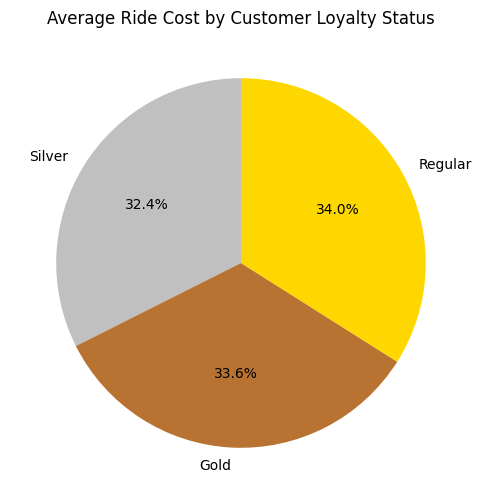

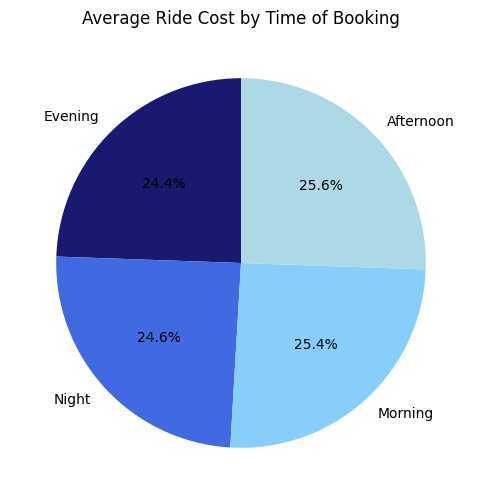

In [39]:
# --- Visualization: average price by customer loyalty status and time of booking (auto + labeled) ---

cols = list(data.columns)

def find_col(cols, candidates):
    """Helper function to find the best matching column name."""
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

# Detect relevant columns
cost_col = find_col(cols, ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price'])
loyalty_col = find_col(cols, ['customer_loyalty_status', 'customer_loyalty', 'loyalty', 'customer_type'])
time_col = find_col(cols, ['time_of_booking', 'booking_time', 'time', 'booking_period'])

print(f"Detected columns:\n Cost: {cost_col}\n Loyalty: {loyalty_col}\n Time: {time_col}\n")

# --- Loyalty Visualization ---
if cost_col and loyalty_col:
    loyalty_avg = data.groupby(loyalty_col)[cost_col].mean().sort_values()

    # Normalize labels to standard names if possible
    label_map = {
        "silver": "Silver",
        "regular": "Regular",
        "gold": "Gold"
    }
    labels = [label_map.get(str(l).lower(), str(l)) for l in loyalty_avg.index]
    values = loyalty_avg.values

    colors_loyalty = ["#C0C0C0", "#B87333", "#FFD700"]  # Silver, Bronze, Gold-like
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90,
            colors=colors_loyalty[:len(values)])
    plt.title("Average Ride Cost by Customer Loyalty Status")
    plt.show()
else:
    print("⚠️ Loyalty columns not detected or missing data.")


# --- Time of Booking Visualization ---
if cost_col and time_col:
    time_avg = data.groupby(time_col)[cost_col].mean().sort_values()

    # Map labels to standard time ranges if applicable
    label_map_time = {
        "morning": "Morning",
        "afternoon": "Afternoon",
        "evening": "Evening",
        "night": "Night"
    }
    labels = [label_map_time.get(str(t).lower(), str(t)) for t in time_avg.index]
    values = time_avg.values

    colors_time = ["#191970", "#4169E1", "#87CEFA", "#ADD8E6"]  # Shades of blue
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90,
            colors=colors_time[:len(values)])
    plt.title("Average Ride Cost by Time of Booking")
    plt.show()
else:
    print("⚠️ Time columns not detected or missing data.")



# (average ride cost by loyalty status)
# The average ride cost share contributed by each loyalty group
# Based on average cost (mean), not number of customers
# Regular will dominate because its average ride cost is highest .

,Customer_Loyalty_Status,mean,count,median
0,Gold,376.118746,313,373.975636
1,Regular,380.125251,320,358.951011
2,Silver,362.772140,367,348.669562


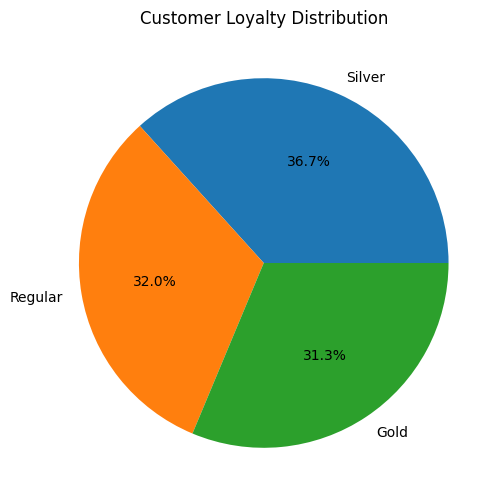

In [40]:
# Customer segmentation: price by loyalty status
seg = data.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].agg(['mean','count','median']).reset_index()
display(seg)

# Pie chart of loyalty distribution (counts)
plt.figure(figsize=(6,6))
plt.pie(data['Customer_Loyalty_Status'].value_counts(), labels=data['Customer_Loyalty_Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Loyalty Distribution')
plt.show()

# (data['Customer_Loyalty_Status'].value_counts())
# It shows The number of customers in each loyalty status category: Regular, Silver, and Gold.
# Based on counts (frequency)
# Silver will dominate because it has the most customers (400).

Detected columns:
 Cost: Historical_Cost_of_Ride
 Location: Location_Category



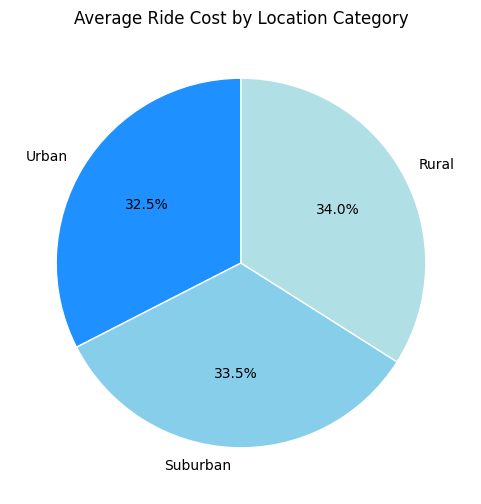

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# --- Visualization: average price by location category (auto + labeled) ---

cols = list(data.columns)

# helper to find best matching column
def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

# find relevant columns
cost_col = find_col(cols, ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price'])
loc_col = find_col(cols, ['location', 'location_category', 'location_type', 'area', 'region'])

print(f"Detected columns:\n Cost: {cost_col}\n Location: {loc_col}\n")

if cost_col is None:
    print("⚠️ Could not find a cost column (historical_cost_of_ride / cost / fare / price). Available columns:\n", cols)
else:
    # Case A: categorical location column
    if loc_col and (data[loc_col].dtype == 'object' or not np.issubdtype(data[loc_col].dtype, np.number)):
        location_avg = data.groupby(loc_col)[cost_col].mean().sort_values()
        labels = location_avg.index.astype(str).tolist()
        values = location_avg.values
    else:
        # Case B: one-hot encoded location columns
        loc_onehots = [c for c in cols if 'location_category' in c.lower() or c.lower().startswith('location_') or c.lower().startswith('loc_')]
        labels, values = [], []
        if len(loc_onehots) > 0:
            for c in loc_onehots:
                parts = c.split('_')
                label = parts[-1].capitalize() if not parts[-1].isdigit() else c
                labels.append(label)
                try:
                    subset_mean = data.loc[data[c] == 1, cost_col].mean()
                except Exception:
                    subset_mean = np.nan
                values.append(subset_mean)
        else:
            labels, values = [], []

    # --- Label mapping ---
    label_map = {
        "urban": "Urban",
        "suburban": "Suburban",
        "rural": "Rural",
        "metro": "Metro",
        "city": "City",
        "town": "Town"
    }
    labels = [label_map.get(str(l).lower(), str(l)) for l in labels]

    # --- Visualization ---
    if len(values) > 0:
        colors = ["#1E90FF", "#87CEEB", "#B0E0E6", "#ADD8E6"]  # shades of blue
        plt.figure(figsize=(6,6))
        plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90,
                colors=colors[:len(values)], wedgeprops={'edgecolor':'white'})
        plt.title("Average Ride Cost by Location Category")
        plt.show()
    else:
        print("⚠️ Could not detect location categories to plot. Available columns:\n", cols)

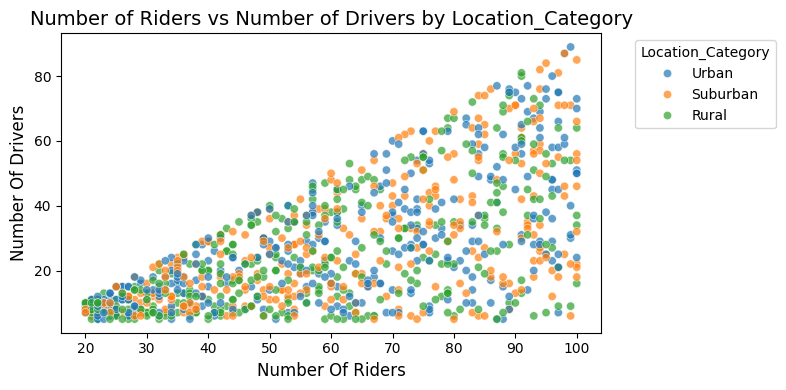

In [41]:
# Number of Riders vs Number of Drivers by Location Category (robust)
cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

riders_candidates = ['number_of_riders', 'number_of_riders', 'num_riders', 'riders', 'ride_count']
drivers_candidates = ['number_of_drivers', 'num_drivers', 'drivers']
location_candidates = ['location', 'location_category_1', 'location_category_2', 'location_category', 'area', 'region']

riders_col = find_col(cols, riders_candidates)
drivers_col = find_col(cols, drivers_candidates)
loc_col = find_col(cols, location_candidates)

if riders_col and drivers_col:
    plt.figure(figsize=(8, 4))
    if loc_col:
        sns.scatterplot(x=riders_col, y=drivers_col, data=data, hue=loc_col, alpha=0.7)
        plt.legend(title=loc_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x=riders_col, y=drivers_col, data=data, alpha=0.7)
    plt.title(f'Number of Riders vs Number of Drivers by {loc_col if loc_col else "(no location)"}', fontsize=14)
    plt.xlabel(riders_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(drivers_col.replace('_', ' ').title(), fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns not found for this plot.")
    print("Available columns:\n", cols)
    print('\nSuggested riders column:', riders_col)
    print('Suggested drivers column:', drivers_col)
    print('Suggested location column:', loc_col)
    print('\nIf the suggestions are incorrect, tell me the correct column names and I will update the cell.')

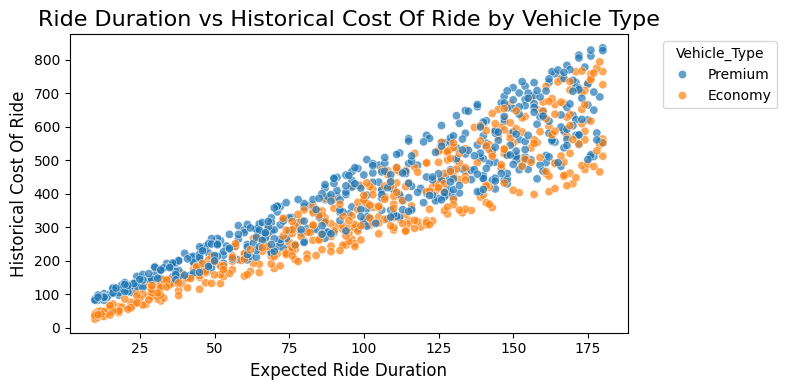

In [42]:
# Ride Duration vs Historical Cost of Ride by Vehicle Type (robust)
cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

duration_candidates = ['expected_ride_duration', 'expected_duration', 'ride_duration', 'duration']
cost_candidates = ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'cost', 'historical_cost_of_ride']
vehicle_candidates = ['vehicle_type', 'vehicle', 'vehicle_type_1']

duration_col = find_col(cols, duration_candidates)
cost_col = find_col(cols, cost_candidates)
vehicle_col = find_col(cols, vehicle_candidates)

if duration_col and cost_col:
    plt.figure(figsize=(8, 4))
    if vehicle_col:
        ax = sns.scatterplot(x=duration_col, y=cost_col, data=data, hue=vehicle_col, alpha=0.7)
        # correct legend location string and use the Axes legend method
        ax.legend(title=vehicle_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x=duration_col, y=cost_col, data=data, alpha=0.7)
    plt.title(f'Ride Duration vs {cost_col.replace("_", " ").title()} by {vehicle_col.replace("_", " ").title() if vehicle_col else "Vehicle"}', fontsize=16)
    plt.xlabel(duration_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(cost_col.replace('_', ' ').title(), fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns for this plot were not found.")
    print("Available columns:\n", cols)
    print('\nSuggested duration column:', duration_col)
    print('Suggested cost column:', cost_col)
    print('Suggested vehicle column:', vehicle_col)
    print('\nIf the suggestions are incorrect, tell me the correct column names and I will update this cell.')


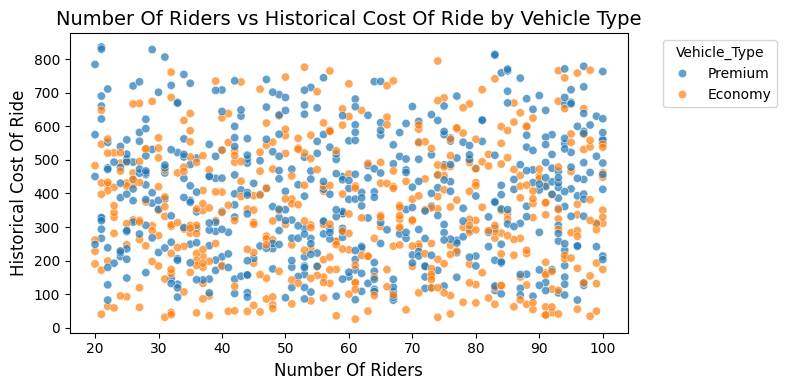

In [43]:
# Ride Cost vs Number of Riders by Vehicle Type
# ---------------------------------------------

cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

riders_candidates = ['number_of_riders', 'riders', 'num_riders']
cost_candidates = ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price']
vehicle_candidates = ['vehicle_type', 'vehicle', 'vehicle_type_1']

riders_col = find_col(cols, riders_candidates)
cost_col = find_col(cols, cost_candidates)
vehicle_col = find_col(cols, vehicle_candidates)

if riders_col and cost_col:
    plt.figure(figsize=(8, 4))
    if vehicle_col:
        ax = sns.scatterplot(x=riders_col, y=cost_col, data=data, hue=vehicle_col, alpha=0.7)
        ax.legend(title=vehicle_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x=riders_col, y=cost_col, data=data, alpha=0.7)

    plt.title(f'{riders_col.replace("_", " ").title()} vs {cost_col.replace("_", " ").title()} by {vehicle_col.replace("_", " ").title() if vehicle_col else "Vehicle"}',
              fontsize=14)
    plt.xlabel(riders_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(cost_col.replace('_', ' ').title(), fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns for this plot were not found.")
    print("Available columns:\n", cols)
    print('\nSuggested riders column:', riders_col)
    print('Suggested cost column:', cost_col)
    print('Suggested vehicle column:', vehicle_col)


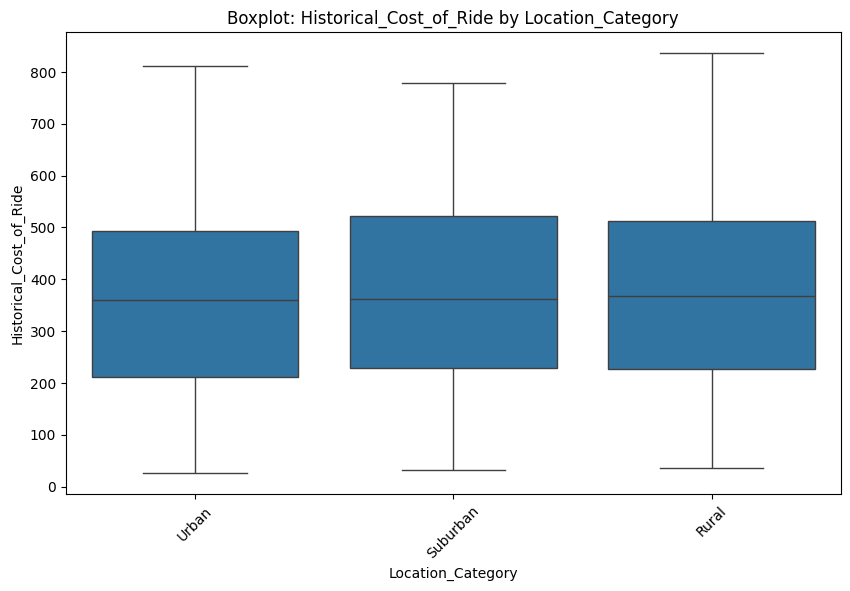

In [44]:
# Boxplot — Price by Location (robust)
# ============================================================

# Candidate names
location_candidates = ['location', 'location_category', 'location_category_1', 'location_category_2', 'area', 'region']
price_candidates = ['price', 'fare', 'cost', 'amount', 'historical_cost_of_ride']

# simple finder
def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

cols = list(data.columns)
loc_col = find_col(cols, location_candidates)
price_col = find_col(cols, price_candidates)

if loc_col and price_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=loc_col, y=price_col, data=data)
    plt.title(f"Boxplot: {price_col} by {loc_col}")
    plt.xlabel(loc_col)
    plt.ylabel(price_col)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Could not auto-detect both 'location' and 'price' columns.")
    print("Available columns:", cols)
    print('\nSuggested location column:', loc_col)
    print('Suggested price column:', price_col)
    print('\nIf these are incorrect, provide the correct column names or rename columns and re-run this cell.')

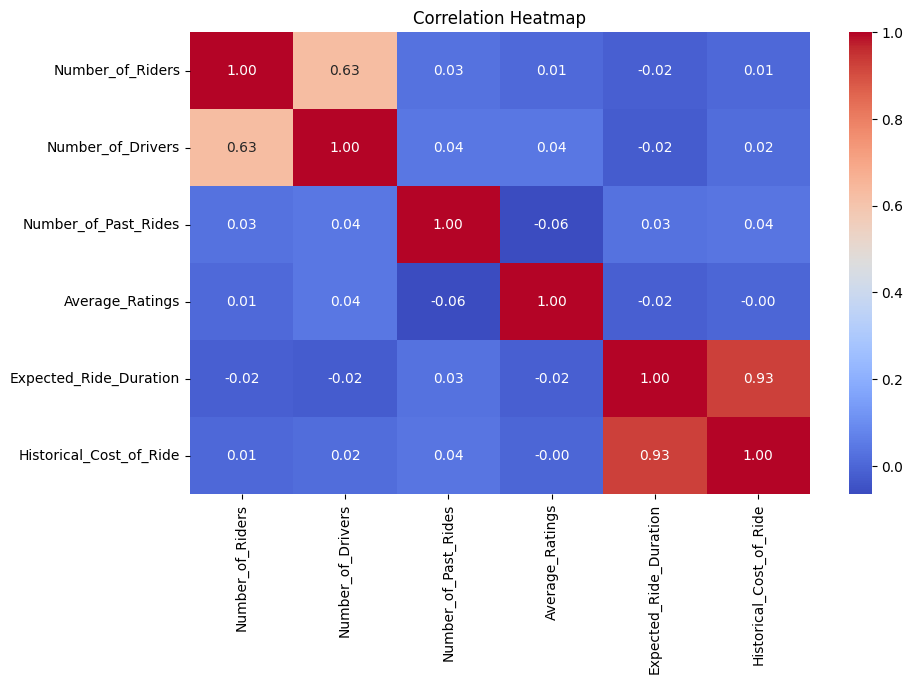

In [45]:
#  Correlation Heatmap
# -------------------------------
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

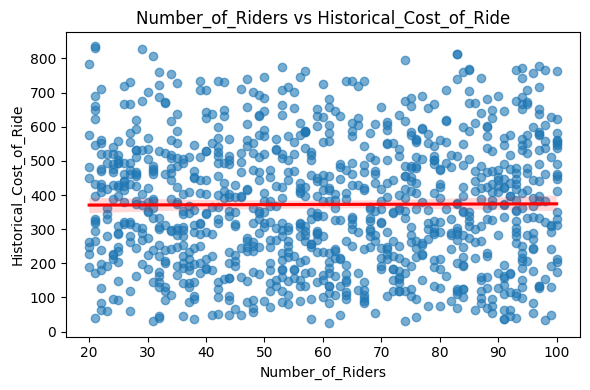

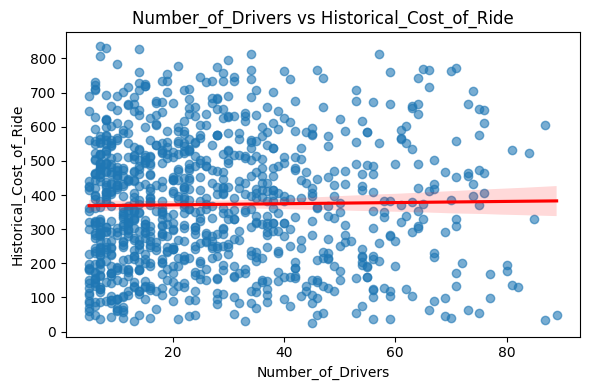

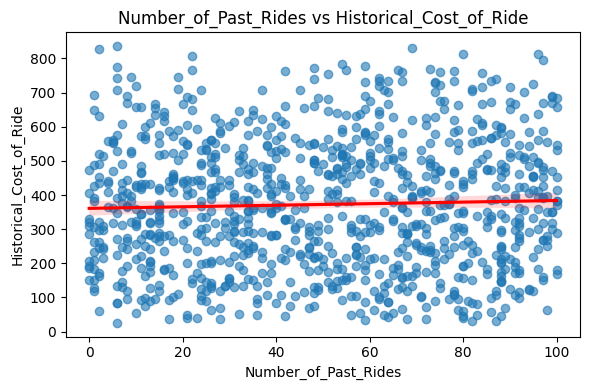

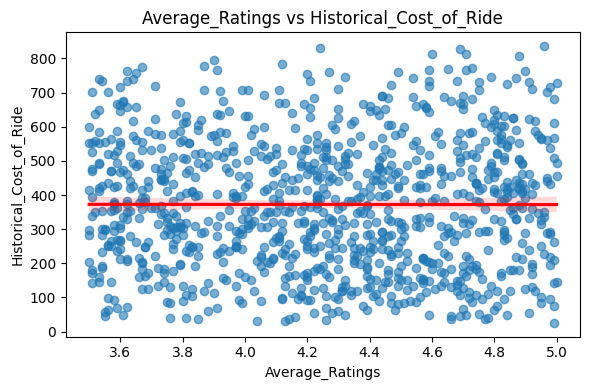

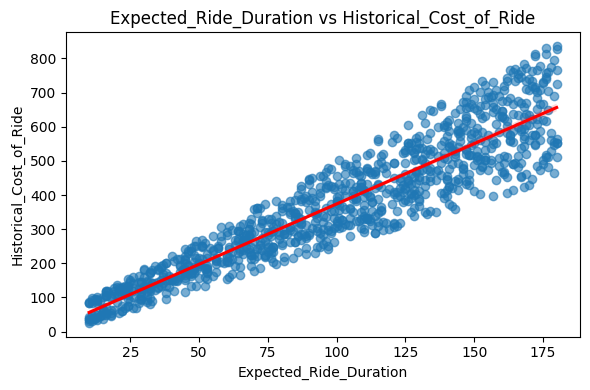

In [48]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

# Linearity Check (Scatterplots + Regression Lines)
# -------------------------------------------------
target = numeric_cols[-1]  # assuming last numeric column is the target

for col in numeric_cols[:-1]:
    plt.figure(figsize=(6, 4))
    
    # Scatter + regression line in one go
    sns.regplot(x=data[col], y=data[target],
                scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()
